### **Importing Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

pd.set_option('display.max_columns', None)

### **Downloading the Dataset**

In [11]:
data_20 = pd.read_csv("C:/Users/Shahm/Downloads/league - Copy/league/full_data_20.csv")
data_40 = pd.read_csv("C:/Users/Shahm/Downloads/league - Copy/league/full_data_40.csv")
data_60 = pd.read_csv("C:/Users/Shahm/Downloads/league - Copy/league/full_data_60.csv")
data_80 = pd.read_csv("C:/Users/Shahm/Downloads/league - Copy/league/full_data_80.csv")
data_100 = pd.read_csv("C:/Users/Shahm/Downloads/league - Copy/league/full_data_100.csv")

In [13]:
data = pd.concat([data_20,data_40,data_60,data_80,data_100])

In [15]:
data.head()

,Unnamed: 0,matchID,fullTimeMS,timePercent,blueChampionKill,blueFirstBlood,blueDragonKill,blueDragonHextechKill,blueDragonChemtechKill,blueDragonFireKill,blueDragonAirKill,blueDragonEarthKill,blueDragonWaterKill,blueDragonElderKill,blueRiftHeraldKill,blueBaronKill,blueTowerKill,blueInhibitorKill,blueTotalGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgPlayerLevel,blueWin,redChampionKill,redFirstBlood,redDragonKill,redDragonHextechKill,redDragonChemtechKill,redDragonFireKill,redDragonAirKill,redDragonEarthKill,redDragonWaterKill,redDragonElderKill,redRiftHeraldKill,redBaronKill,redTowerKill,redInhibitorKill,redTotalGold,redMinionsKilled,redJungleMinionsKilled,redAvgPlayerLevel,redWin
0,0,BR1_2720891721,2092233,6,5,True,0,0,0,0,0,0,0,0,0,0,0,0,9299,85,24,4.6,True,3,False,0,0,0,0,0,0,0,0,0,0,0,0,8014,57,30,4.2,False
1,1,BR1_2720337066,1867984,6,1,False,0,0,0,0,0,0,0,0,0,0,0,0,7846,82,32,4.4,False,3,True,0,0,0,0,0,0,0,0,0,0,0,0,9018,91,40,4.8,True
2,2,BR1_2720218416,2396948,7,3,False,0,0,0,0,0,0,0,0,0,0,0,0,10890,122,40,5.2,True,1,True,0,0,0,0,0,0,0,0,0,0,0,0,9085,94,36,5.0,False
3,3,BR1_2720199652,1656791,5,2,True,0,0,0,0,0,0,0,0,0,0,0,0,8073,89,28,4.2,True,1,False,0,0,0,0,0,0,0,0,0,0,0,0,7220,91,20,4.4,False
4,4,BR1_2720058177,1875549,6,2,False,0,0,0,0,0,0,0,0,0,0,0,0,8438,92,28,4.4,False,5,True,0,0,0,0,0,0,0,0,0,0,0,0,10378,83,36,4.8,True


In [17]:
data[data["matchID"]=="BR1_2720891721"]

,Unnamed: 0,matchID,fullTimeMS,timePercent,blueChampionKill,blueFirstBlood,blueDragonKill,blueDragonHextechKill,blueDragonChemtechKill,blueDragonFireKill,blueDragonAirKill,blueDragonEarthKill,blueDragonWaterKill,blueDragonElderKill,blueRiftHeraldKill,blueBaronKill,blueTowerKill,blueInhibitorKill,blueTotalGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgPlayerLevel,blueWin,redChampionKill,redFirstBlood,redDragonKill,redDragonHextechKill,redDragonChemtechKill,redDragonFireKill,redDragonAirKill,redDragonEarthKill,redDragonWaterKill,redDragonElderKill,redRiftHeraldKill,redBaronKill,redTowerKill,redInhibitorKill,redTotalGold,redMinionsKilled,redJungleMinionsKilled,redAvgPlayerLevel,redWin
0,0,BR1_2720891721,2092233,6,5,True,0,0,0,0,0,0,0,0,0,0,0,0,9299,85,24,4.6,True,3,False,0,0,0,0,0,0,0,0,0,0,0,0,8014,57,30,4.2,False
0,0,BR1_2720891721,2092233,13,16,True,1,0,0,1,0,0,0,0,0,0,0,0,22925,209,64,7.6,True,11,False,0,0,0,0,0,0,0,0,0,0,0,0,20536,171,60,7.6,False
0,0,BR1_2720891721,2092233,20,27,True,2,1,0,1,0,0,0,0,0,0,4,0,38756,299,100,10.0,True,22,False,0,0,0,0,0,0,0,0,1,0,2,0,34650,256,88,10.0,False
0,0,BR1_2720891721,2092233,27,37,True,2,1,0,1,0,0,0,0,0,0,8,1,51702,377,112,12.2,True,36,False,1,0,1,0,0,0,0,0,1,1,2,0,49736,318,116,12.6,False
0,0,BR1_2720891721,2092233,35,44,True,3,1,1,1,0,0,0,0,0,0,11,3,65209,499,151,14.4,True,44,False,2,0,2,0,0,0,0,0,1,1,2,0,62978,478,140,15.0,False


In [19]:
data.columns

Index(['Unnamed: 0', 'matchID', 'fullTimeMS', 'timePercent',
       'blueChampionKill', 'blueFirstBlood', 'blueDragonKill',
       'blueDragonHextechKill', 'blueDragonChemtechKill', 'blueDragonFireKill',
       'blueDragonAirKill', 'blueDragonEarthKill', 'blueDragonWaterKill',
       'blueDragonElderKill', 'blueRiftHeraldKill', 'blueBaronKill',
       'blueTowerKill', 'blueInhibitorKill', 'blueTotalGold',
       'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgPlayerLevel',
       'blueWin', 'redChampionKill', 'redFirstBlood', 'redDragonKill',
       'redDragonHextechKill', 'redDragonChemtechKill', 'redDragonFireKill',
       'redDragonAirKill', 'redDragonEarthKill', 'redDragonWaterKill',
       'redDragonElderKill', 'redRiftHeraldKill', 'redBaronKill',
       'redTowerKill', 'redInhibitorKill', 'redTotalGold', 'redMinionsKilled',
       'redJungleMinionsKilled', 'redAvgPlayerLevel', 'redWin'],
      dtype='object')

In [21]:
data["time_elapsed"] = (data["timePercent"]/100 * data["fullTimeMS"])/1000/60

In [23]:
data = data.drop(columns=['Unnamed: 0','timePercent','fullTimeMS',"blueWin","matchID","blueFirstBlood" ,'blueDragonHextechKill',
       'blueDragonChemtechKill', 'blueDragonFireKill', 'blueDragonAirKill',
       'blueDragonEarthKill', 'blueDragonWaterKill','redDragonHextechKill',
       'redDragonChemtechKill', 'redDragonFireKill', 'redDragonAirKill',
       'redDragonEarthKill', 'redDragonWaterKill'])

In [25]:
data["redFirstBlood"] = data["redFirstBlood"].apply(lambda x: 1 if x==True else 0)
data["redWin"] = data["redWin"].apply(lambda x: 1 if x==True else 0)

In [27]:
data.describe()

,blueChampionKill,blueDragonKill,blueDragonElderKill,blueRiftHeraldKill,blueBaronKill,blueTowerKill,blueInhibitorKill,blueTotalGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgPlayerLevel,redChampionKill,redFirstBlood,redDragonKill,redDragonElderKill,redRiftHeraldKill,redBaronKill,redTowerKill,redInhibitorKill,redTotalGold,redMinionsKilled,redJungleMinionsKilled,redAvgPlayerLevel,redWin,time_elapsed
count,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000,322780.000000
mean,15.651366,0.933958,0.009530,0.571033,0.138875,2.616014,0.276266,30678.321807,321.533388,84.973772,9.206422,15.397122,0.467532,0.933329,0.009706,0.474642,0.150053,1.555124,0.174289,30664.146115,323.828725,86.125807,9.220576,0.495090,5.397598
std,13.582740,1.146992,0.105472,0.720533,0.410188,3.429990,0.772603,20719.100002,206.805470,56.833013,4.293401,13.525076,0.498945,1.154560,0.106813,0.665197,0.428558,2.297157,0.592004,20774.390946,208.260744,57.562033,4.302676,0.499977,4.212747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2500.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2500.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12245.000000,138.000000,40.000000,5.600000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12209.750000,139.000000,40.000000,5.600000,0.000000,2.112781
50%,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,27226.000000,308.000000,76.000000,9.200000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27091.000000,310.000000,76.000000,9.200000,0.000000,4.424347
75%,24.000000,2.000000,0.000000,1.000000,0.000000,4.000000,0.000000,44942.000000,473.000000,120.000000,12.400000,23.000000,1.000000,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,44905.000000,477.000000,122.000000,12.400000,1.000000,7.591249
max,99.000000,8.000000,4.000000,2.000000,4.000000,18.000000,11.000000,140402.000000,1428.000000,436.000000,18.000000,95.000000,1.000000,7.000000,3.000000,2.000000,4.000000,11.000000,10.000000,131620.000000,1393.000000,436.000000,18.000000,1.000000,45.798680


In [29]:
X = data.drop(columns="redWin")
y = data.redWin

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Data Scaling**

In [34]:
# using standard scaler to scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Dimensionality reduction**

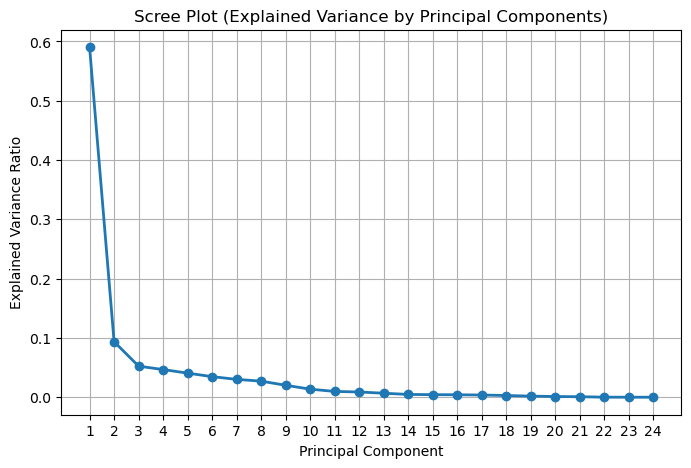

In [37]:
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

# 4. Scree Plot: Explained Variance
explained_var = pca.explained_variance_ratio_
components = np.arange(1, len(explained_var) + 1)

plt.figure(figsize=(8, 5))
plt.plot(components, explained_var, marker='o', linestyle='-', linewidth=2)
plt.title('Scree Plot (Explained Variance by Principal Components)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(components)
plt.grid(True)
plt.show()

In [39]:
pca = PCA(n_components=8)
train_pca = pca.fit_transform(X_train_scaled)
test_pca = pca.transform(X_test_scaled)

### **Data Table for Evaluation Metrics**

In [42]:
eval = pd.DataFrame(columns=['algorithm','train_accuracy','test_accuracy','precision_score','recall_score','f1_score','roc_auc_score'])

### **K-Nearest Neighbours (KNN)**

In [45]:
# fitting a k-nearest neighbor model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# getting prediction from knn
prediction = knn.predict(np.array(test_pca))
prediction

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [48]:
# checking the first 20 rows of the prediction
prediction[:20] == y_test[:20]

46947     True
14544     True
36733     True
28184    False
17914     True
35846     True
42330    False
36509     True
2755      True
38512     True
15156     True
23203     True
34405     True
63494     True
44344     True
11262    False
8042     False
32834    False
54042     True
40841     True
Name: redWin, dtype: bool

In [49]:
# checking the accuracy of the model
knn.score(np.array(test_pca), np.array(y_test))

0.7273375054216494

#### Selecting the optimal value for n_neighbors

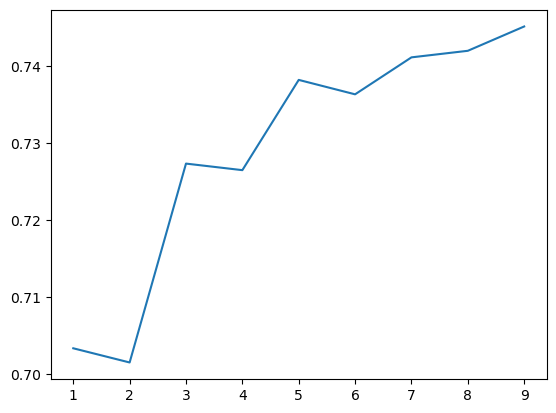

In [54]:
# running the model for different values of K

results = np.empty(9)   # marginally faster
# results = np.zeros(9)   # safer
for K in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=K)
  knn.fit(train_pca, y_train)
  results[K-1] = knn.score(test_pca, y_test)
%matplotlib inline

plt.plot(np.arange(9)+1,results)

#### Model Selection and Evaluation

In [57]:
# selecting the best model

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(train_pca, y_train)
prediction = knn.predict(test_pca)
print("Accuracy on training set: {:.3f}".format(
knn.score(train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(test_pca, y_test)))

Accuracy on training set: 0.795
Accuracy on test set: 0.745


In [59]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75     32521
           1       0.74      0.75      0.75     32035

    accuracy                           0.75     64556
   macro avg       0.75      0.75      0.75     64556
weighted avg       0.75      0.75      0.75     64556



In [61]:
# getting the evulation metrics for the table
train_accuracy = knn.score(train_pca, y_train)
test_accuracy = knn.score(test_pca, y_test)
precision = precision_score(y_test, prediction,average='weighted')
recall = recall_score(y_test, prediction,average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')
auc_score = roc_auc_score(y_test, prediction)

# pushing the metrics to the table
results = ["K Nearest Neighbors",train_accuracy, test_accuracy, precision, recall, f1,auc_score]
new_row = pd.DataFrame([results], columns=["algorithm","train_accuracy", "test_accuracy", "precision_score", "recall_score", "f1_score","roc_auc_score"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

C:\Users\Shahm\AppData\Local\Temp\ipykernel_4352\3197477214.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eval = pd.concat([eval, new_row], ignore_index=True)


,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,0.794682,0.745151,0.745245,0.745151,0.74515,0.745197


### **Decision tree learning (DT)**

In [64]:
# fitting a decision tree classifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf = clf.fit(train_pca, y_train)

In [66]:
# generating predictions for the test set
prediction = clf.predict(test_pca)

In [68]:
# comparing the first 20 predictions with the actual values
prediction[:20] == y_test[:20]

46947    False
14544    False
36733     True
28184     True
17914     True
35846    False
42330    False
36509     True
2755      True
38512     True
15156    False
23203     True
34405     True
63494    False
44344     True
11262     True
8042     False
32834    False
54042    False
40841    False
Name: redWin, dtype: bool

In [70]:
# getting the accuracy on the test set
clf.score(test_pca, y_test)

0.7021965425367123

#### Using a different parameter setting for the model

In [73]:
# using a different criterion for the decision tree

clf = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
clf = clf.fit(train_pca, y_train)
prediction = clf.predict(test_pca)
clf.score(test_pca, y_test)

0.7008178945411736

#### Model Selection and Evaluation

In [76]:
# selecting the best model

clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf.fit(train_pca, y_train)
prediction = clf.predict(test_pca)
print("Accuracy on training set: {:.3f}".format(
clf.score(train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(test_pca, y_test)))

Accuracy on training set: 0.989
Accuracy on test set: 0.702


In [78]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     32521
           1       0.70      0.69      0.70     32035

    accuracy                           0.70     64556
   macro avg       0.70      0.70      0.70     64556
weighted avg       0.70      0.70      0.70     64556



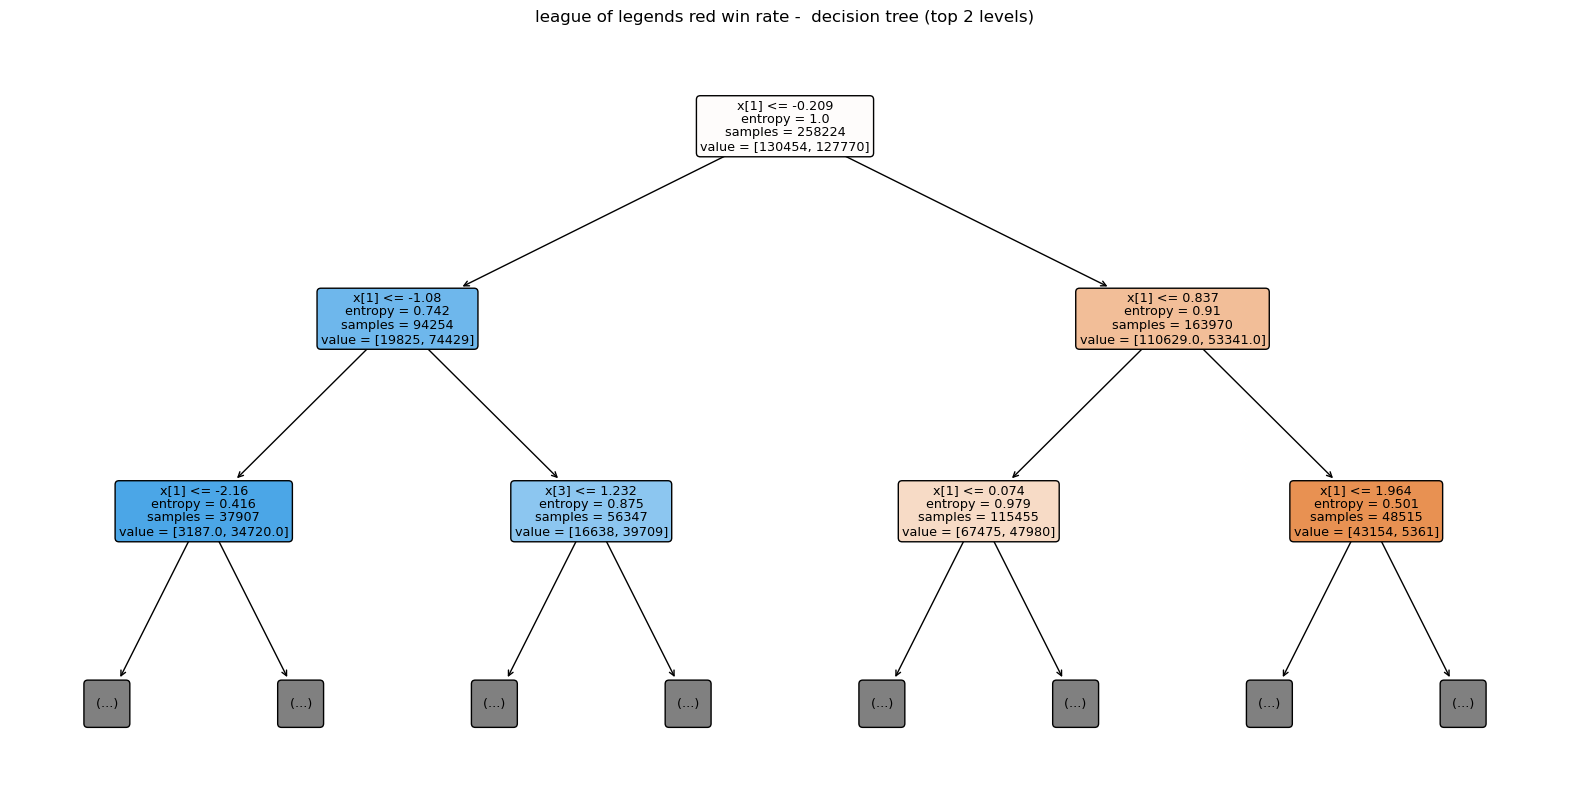

In [80]:
# Visualize top layers of the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, max_depth=2, filled=True, rounded=True)
plt.title("league of legends red win rate -  decision tree (top 2 levels)")
plt.show()

In [82]:
# getting the evulation metrics for the table
train_accuracy = clf.score(train_pca, y_train)
test_accuracy = clf.score(test_pca, y_test)
precision = precision_score(y_test, prediction,average='weighted')
recall = recall_score(y_test, prediction,average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')
auc_score = roc_auc_score(y_test, prediction)

# pushing the metrics to the table
results = ["Decision Tree Classifier",train_accuracy, test_accuracy, precision, recall, f1,auc_score]
new_row = pd.DataFrame([results], columns=["algorithm","train_accuracy", "test_accuracy", "precision_score", "recall_score", "f1_score","roc_auc_score"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,0.794682,0.745151,0.745245,0.745151,0.745150,0.745197
1,Decision Tree Classifier,0.989490,0.702197,0.702247,0.702197,0.702135,0.702096


### **Support Vector Machine (SVM)**

In [85]:
# fitting a SVM
svm = LinearSVC()
svm.fit(train_pca,y_train)

C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [87]:
# getting the predictions from the test data
prediction = svm.predict(test_pca)

In [89]:
# comparing the first 20 predictions with the actual values
prediction[:20] == y_test[:20]

46947     True
14544     True
36733     True
28184     True
17914    False
35846     True
42330    False
36509     True
2755      True
38512     True
15156     True
23203     True
34405     True
63494     True
44344     True
11262     True
8042     False
32834     True
54042    False
40841     True
Name: redWin, dtype: bool

In [91]:
# accuracy of the model
svm.score(test_pca,y_test)

0.7277402565214698

#### Running the model on the different parameter setting

In [94]:
# using a differnet kernel setting
rbf_feature = RBFSampler(gamma=1, random_state=1)
svm = make_pipeline(rbf_feature, SGDClassifier())
svm.fit(train_pca, y_train)
prediction = svm.predict(test_pca)
svm.score(test_pca,y_test)

0.6413656360369292

#### Model Selection and Evaluation

In [97]:
# using the best model
svm = LinearSVC()
svm.fit(train_pca, y_train)
prediction = svm.predict(test_pca)
print("Accuracy on training set: {:.3f}".format(
svm.score(train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(test_pca, y_test)))

C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy on training set: 0.725
Accuracy on test set: 0.728


C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [99]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     32521
           1       0.74      0.70      0.72     32035

    accuracy                           0.73     64556
   macro avg       0.73      0.73      0.73     64556
weighted avg       0.73      0.73      0.73     64556



In [101]:
# getting the evulation metrics for the table
train_accuracy = svm.score(train_pca, y_train)
test_accuracy = svm.score(test_pca, y_test)
precision = precision_score(y_test, prediction,average='weighted')
recall = recall_score(y_test, prediction,average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')
auc_score = roc_auc_score(y_test,prediction)

# pushing the metrics to the table
results = ["Support Vector Machine",train_accuracy, test_accuracy, precision, recall, f1,auc_score]
new_row = pd.DataFrame([results], columns=["algorithm","train_accuracy", "test_accuracy", "precision_score", "recall_score", "f1_score","roc_auc_score"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,0.794682,0.745151,0.745245,0.745151,0.745150,0.745197
1,Decision Tree Classifier,0.989490,0.702197,0.702247,0.702197,0.702135,0.702096
2,Support Vector Machine,0.725277,0.727849,0.728567,0.727849,0.727535,0.727605


### **Neural networks (NN)**

In [104]:
# fitting the multi layer perceptron model
mlp = MLPClassifier(random_state=42)
mlp = mlp.fit(train_pca, y_train)

In [105]:
# generate the predictions from the test set
prediction =  mlp.predict(test_pca)

In [108]:
# comparing the first 20 predictions with the actual values
prediction[:20] == y_test[:20]

46947    False
14544     True
36733    False
28184    False
17914    False
35846     True
42330    False
36509     True
2755     False
38512     True
15156     True
23203     True
34405     True
63494     True
44344     True
11262     True
8042     False
32834     True
54042     True
40841     True
Name: redWin, dtype: bool

In [110]:
# accuracy of the model on the test set
mlp.score(test_pca, y_test)

0.7579620794349092

#### Optimizing the parameters of the model

In [113]:
# increasing the number of hidden units in the MLP
mlp = MLPClassifier(hidden_layer_sizes=300,random_state=42)
mlp = mlp.fit(train_pca, y_train)
prediction =  mlp.predict(test_pca)
mlp.score(test_pca, y_test)

0.7621754755561063

#### Model Selection and Evaluation

In [116]:
# increasing the number of hidden units in the MLP
mlp = MLPClassifier(hidden_layer_sizes=300,random_state=42)
mlp = mlp.fit(train_pca, y_train)
prediction =  mlp.predict(test_pca)
mlp.score(test_pca, y_test)

0.7621754755561063

In [117]:
# getting the evulation metrics for the table
train_accuracy = mlp.score(train_pca, y_train)
test_accuracy = mlp.score(test_pca, y_test)
precision = precision_score(y_test, prediction,average='weighted')
recall = recall_score(y_test, prediction,average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')
auc_score = roc_auc_score(y_test, prediction)

# pushing the metrics to the table
results = ["Neural Network",train_accuracy, test_accuracy, precision, recall, f1,auc_score]
new_row = pd.DataFrame([results], columns=["algorithm","train_accuracy", "test_accuracy", "precision_score", "recall_score", "f1_score","roc_auc_score"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,0.794682,0.745151,0.745245,0.745151,0.745150,0.745197
1,Decision Tree Classifier,0.989490,0.702197,0.702247,0.702197,0.702135,0.702096
2,Support Vector Machine,0.725277,0.727849,0.728567,0.727849,0.727535,0.727605
3,Neural Network,0.761463,0.762175,0.769601,0.762175,0.760736,0.762775


### **Custom Model - (Logistic Regression From Scracth)** 

In [121]:
def one_hot(y, num_classes):
    """Convert an array of labels to one-hot encoded matrix."""
    return np.eye(num_classes)[y]

In [123]:
def softmax(z):
    """Compute the softmax of each row of the input z."""
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [125]:
def predict(X, W, b):
    """Predict class labels for samples in X."""
    z = np.dot(X, W) + b
    probabilities = softmax(z)
    return np.argmax(probabilities, axis=1)

In [127]:
num_classes = len(np.unique(y_train))
y_train_encoded = one_hot(y_train, num_classes)
y_test_encoded = one_hot(y_test, num_classes)

In [129]:
n_features = train_pca.shape[1]
W = np.random.randn(n_features, num_classes) * 0.01
b = np.zeros((1, num_classes))

In [131]:
learning_rate = 0.1
num_epochs = 1000
m = train_pca.shape[0]

In [133]:
for epoch in range(num_epochs):
    # Forward pass
    z = np.dot(train_pca, W) + b
    a = softmax(z)
    
    # Compute categorical cross-entropy loss
    loss = -np.sum(y_train_encoded * np.log(a + 1e-8)) / m

    # Backward pass: compute gradients
    dz = a - y_train_encoded
    dW = np.dot(train_pca.T, dz) / m
    db = np.sum(dz, axis=0, keepdims=True) / m
    
    # Update parameters
    W -= learning_rate * dW
    b -= learning_rate * db
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 0.6904
Epoch 100: Loss = 0.5185
Epoch 200: Loss = 0.5172
Epoch 300: Loss = 0.5171
Epoch 400: Loss = 0.5170
Epoch 500: Loss = 0.5170
Epoch 600: Loss = 0.5170
Epoch 700: Loss = 0.5170
Epoch 800: Loss = 0.5170
Epoch 900: Loss = 0.5170


In [135]:
# Compute training accuracy
train_preds = predict(train_pca, W, b)
train_accuracy = np.mean(train_preds == y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

z_test = np.dot(test_pca, W) + b
a_test = softmax(z_test)
predictions = np.argmax(a_test, axis=1)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Train Accuracy: 72.62%
Test Accuracy: 72.86%


In [137]:
# Use average='macro' for multiclass metrics
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

# For ROC AUC, you need one-hot encoded true and predicted probs (not labels)
roc_auc = roc_auc_score(y_test_encoded, a_test, average='macro', multi_class='ovr')

In [139]:
results = [
    "Scratch Logistic Regression",  # Algorithm name
    train_accuracy,                 # Training Accuracy
    accuracy,                       # Test Accuracy
    precision,
    recall,
    f1,
    roc_auc
]

new_row = pd.DataFrame([results], columns=[
    "algorithm",
    "train_accuracy",
    "test_accuracy",
    "precision_score",
    "recall_score",
    "f1_score",
    "roc_auc_score"
])

eval = pd.concat([eval, new_row], ignore_index=True)
eval

,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,0.794682,0.745151,0.745245,0.745151,0.745150,0.745197
1,Decision Tree Classifier,0.989490,0.702197,0.702247,0.702197,0.702135,0.702096
2,Support Vector Machine,0.725277,0.727849,0.728567,0.727849,0.727535,0.727605
3,Neural Network,0.761463,0.762175,0.769601,0.762175,0.760736,0.762775
4,Scratch Logistic Regression,0.726180,0.728639,0.729475,0.728391,0.728240,0.821989


### **Custom Model - (Neural Network From Scracth)** 

In [142]:
unique_labels = np.unique(y_train)
print("Unique labels in training set:", unique_labels)

Unique labels in training set: [0 1]


In [144]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(np.float32)

def softmax(x):
    # Numerically stable softmax
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [146]:
n_features = train_pca.shape[1]
n_hidden = 128              # Number of neurons in the hidden layer
n_output = unique_labels.shape[0] 

In [148]:
# Initialize weights and biases with small random values
W1 = np.random.randn(n_features, n_hidden) * 0.01
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output) * 0.01
b2 = np.zeros((1, n_output))

In [150]:
learning_rate = 0.1
num_epochs = 1000
m = train_pca.shape[0]  # number of training samples

In [152]:
for epoch in range(num_epochs):
    # Forward pass
    z1 = np.dot(train_pca, W1) + b1      # Hidden layer linear transformation
    a1 = relu(z1)                     # Hidden layer activation
    z2 = np.dot(a1, W2) + b2           # Output layer linear transformation
    a2 = softmax(z2)                  # Output layer (softmax probabilities)
    
    # Compute sparse categorical cross-entropy loss
    # For each sample, use its mapped label to index the softmax probabilities
    correct_logprobs = -np.log(a2[np.arange(m), y_train] + 1e-8)
    loss = np.sum(correct_logprobs) / m

    # Backward pass
    dz2 = a2.copy()
    dz2[np.arange(m), y_train] -= 1  # derivative for softmax+cross-entropy
    dz2 /= m

    # Gradients for output layer
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    
    # Backpropagate into hidden layer
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)
    
    # Gradients for hidden layer
    dW1 = np.dot(train_pca.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)
    
    # Update weights and biases using gradient descent
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 0.6936
Epoch 100: Loss = 0.5630
Epoch 200: Loss = 0.5177
Epoch 300: Loss = 0.5101
Epoch 400: Loss = 0.5075
Epoch 500: Loss = 0.5060
Epoch 600: Loss = 0.5050
Epoch 700: Loss = 0.5041
Epoch 800: Loss = 0.5032
Epoch 900: Loss = 0.5025


In [153]:
# Compute training accuracy
z1_train = np.dot(train_pca, W1) + b1
a1_train = relu(z1_train)
z2_train = np.dot(a1_train, W2) + b2
a2_train = softmax(z2_train)
train_predictions = np.argmax(a2_train, axis=1)
train_accuracy = np.mean(train_predictions == y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")


z1_test = np.dot(test_pca, W1) + b1
a1_test = relu(z1_test)
z2_test = np.dot(a1_test, W2) + b2
a2_test = softmax(z2_test)
predictions = np.argmax(a2_test, axis=1)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Train Accuracy: 73.28%
Test Accuracy: 73.50%


In [156]:
# Convert predictions back to original labels if needed
# Already using mapped labels, so skip this unless reversed mapping needed

# Evaluation metrics (macro average for multiclass)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

# ROC-AUC requires one-hot true labels and softmax probabilities
roc_auc = roc_auc_score(y_test_encoded, a2_test, average='macro', multi_class='ovr')

In [158]:
results = [
    "Scratch Neural Network",
    train_accuracy,
    accuracy,
    precision,
    recall,
    f1,
    roc_auc
]


In [160]:
new_row = pd.DataFrame([results], columns=[
    "algorithm",
    "train_accuracy",
    "test_accuracy",
    "precision_score",
    "recall_score",
    "f1_score",
    "roc_auc_score"
])

eval = pd.concat([eval, new_row], ignore_index=True)
eval

,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,0.794682,0.745151,0.745245,0.745151,0.745150,0.745197
1,Decision Tree Classifier,0.989490,0.702197,0.702247,0.702197,0.702135,0.702096
2,Support Vector Machine,0.725277,0.727849,0.728567,0.727849,0.727535,0.727605
3,Neural Network,0.761463,0.762175,0.769601,0.762175,0.760736,0.762775
4,Scratch Logistic Regression,0.726180,0.728639,0.729475,0.728391,0.728240,0.821989
5,Scratch Neural Network,0.732775,0.734959,0.735781,0.734718,0.734585,0.830587


### **Custom Model - (Naive Bayes From Scratch)**

In [163]:
def fit_gaussian_nb(X, y):
    """Compute the class priors, means, and variances for each class."""
    classes = np.unique(y)
    priors = {}
    means = {}
    vars_ = {}
    
    for cls in classes:
        X_c = X[y == cls]
        priors[cls] = X_c.shape[0] / X.shape[0]
        means[cls] = np.mean(X_c, axis=0)
        vars_[cls] = np.var(X_c, axis=0) + 1e-9  # add small value to avoid division by zero
        
    return {'classes': classes, 'priors': priors, 'means': means, 'vars': vars_}



In [165]:
def gaussian_probability(x, mean, var):
    """Compute the Gaussian probability density for a given value x."""
    exponent = np.exp(- ((x - mean) ** 2) / (2 * var))
    return (1 / np.sqrt(2 * np.pi * var)) * exponent



In [167]:

def predict_instance(x, model):
    """Predict the class label for a single instance x using the model parameters."""
    classes = model['classes']
    priors = model['priors']
    means = model['means']
    vars_ = model['vars']
    
    posteriors = []
    # Calculate the log posterior probability for each class.
    for cls in classes:
        prior_log = np.log(priors[cls])
        # Compute the log likelihood by summing the log Gaussian probabilities for each feature.
        likelihood_log = np.sum(np.log(gaussian_probability(x, means[cls], vars_[cls])))
        posterior = prior_log + likelihood_log
        posteriors.append(posterior)
        
    # Return the class with the highest posterior probability.
    return classes[np.argmax(posteriors)]



In [169]:
def predict_gaussian_nb(X, model):
    """Predict the class labels for a dataset X using the model parameters."""
    predictions = np.array([predict_instance(x, model) for x in X])
    return predictions



In [171]:
def predict_proba_gaussian_nb(X, model):
    """Return the class probability estimates for input X."""
    classes = model['classes']
    priors = model['priors']
    means = model['means']
    vars_ = model['vars']
    
    all_probs = []

    for x in X:
        probs = []
        for cls in classes:
            # Prior probability in log
            prior_log = np.log(priors[cls])
            # Likelihood in log space
            likelihood_log = np.sum(np.log(gaussian_probability(x, means[cls], vars_[cls])))
            # Posterior in log space
            posterior_log = prior_log + likelihood_log
            probs.append(posterior_log)
        
        # Convert log-posteriors to normal space and normalize
        probs = np.exp(probs - np.max(probs))  # softmax-like stabilization
        probs /= np.sum(probs)
        all_probs.append(probs)
        
    return np.array(all_probs)  # Shape: (n_samples, n_classes)


In [173]:
# Fit the model on the training data
model = fit_gaussian_nb(train_pca, y_train)
# Predict on both training and testing data
train_preds = predict_gaussian_nb(train_pca, model)
test_preds = predict_gaussian_nb(test_pca, model)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Gaussian Naive Bayes Training Accuracy: {train_accuracy:.2f}%")
print(f"Gaussian Naive Bayes Testing Accuracy: {test_accuracy:.2f}%")

Gaussian Naive Bayes Training Accuracy: 0.72%
Gaussian Naive Bayes Testing Accuracy: 0.72%


In [174]:
from sklearn.preprocessing import LabelEncoder

# Label encode y_test to get numeric values
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
test_preds_encoded = le.transform(test_preds)

# One-hot encode true labels for ROC-AUC
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder( sparse_output=False,categories='auto')
y_test_ohe = ohe.fit_transform(y_test_encoded.reshape(-1, 1))


In [177]:
precision = precision_score(y_test, test_preds, average='macro')
recall = recall_score(y_test, test_preds, average='macro')
f1 = f1_score(y_test, test_preds, average='macro')
y_probs = predict_proba_gaussian_nb(test_pca, model)

# Step 4: ROC AUC calculation
roc_auc = roc_auc_score(y_test_ohe, y_probs, average='macro', multi_class='ovr')


In [178]:
results = [
    "Scratch Gaussian NB",
    train_accuracy / 100,  # convert from percentage
    test_accuracy / 100,
    precision,
    recall,
    f1,
    roc_auc
]

new_row = pd.DataFrame([results], columns=[
    "algorithm",
    "train_accuracy",
    "test_accuracy",
    "precision_score",
    "recall_score",
    "f1_score",
    "roc_auc_score"
])

eval = pd.concat([eval, new_row], ignore_index=True)
eval


,algorithm,train_accuracy,test_accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,K Nearest Neighbors,0.794682,0.745151,0.745245,0.745151,0.745150,0.745197
1,Decision Tree Classifier,0.989490,0.702197,0.702247,0.702197,0.702135,0.702096
2,Support Vector Machine,0.725277,0.727849,0.728567,0.727849,0.727535,0.727605
3,Neural Network,0.761463,0.762175,0.769601,0.762175,0.760736,0.762775
4,Scratch Logistic Regression,0.726180,0.728639,0.729475,0.728391,0.728240,0.821989
5,Scratch Neural Network,0.732775,0.734959,0.735781,0.734718,0.734585,0.830587
6,Scratch Gaussian NB,0.007208,0.007235,0.725240,0.723161,0.722763,0.813407


In [181]:
eval.to_csv("league_classification_eval.csv", index=False)